In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df =pd.read_csv('/content/drive/MyDrive/datasets/Amazon.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
5837,2020-07-27,3062.000000,3098.000000,3015.770020,3055.209961,3055.209961,4170500
5838,2020-07-28,3054.270020,3077.090088,2995.760010,3000.330078,3000.330078,3126700
5839,2020-07-29,3030.989990,3039.159912,2996.770020,3033.530029,3033.530029,2974100
5840,2020-07-30,3014.000000,3092.000000,3005.000000,3051.879883,3051.879883,6128300


In [ ]:
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df.shape

(5842, 7)

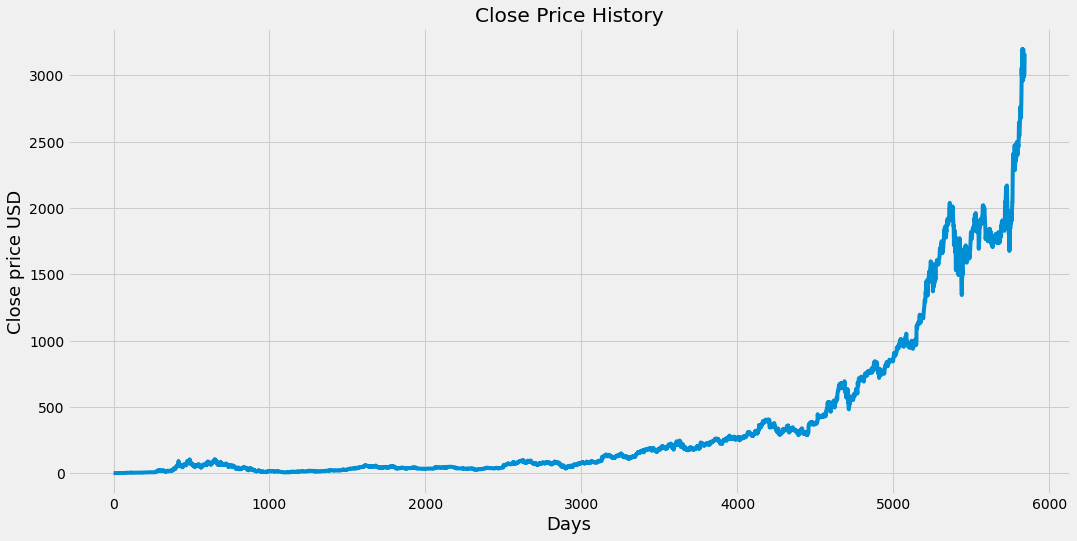

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Days', fontsize = 18)
plt.ylabel('Close price USD', fontsize = 18)
plt.show()

In [ ]:
# Data frame with only close column
data = df.filter(['Close'])
dataset = data.values

In [ ]:
#Geting the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8)
training_data_len

4674

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.75857959e-04],
       [1.04212099e-04],
       [9.76988660e-05],
       ...,
       [9.47955432e-01],
       [9.53692264e-01],
       [9.88957662e-01]])

In [ ]:
# Create trainng data set
#Creating scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train datasets
x_train = []
y_train = []

In [ ]:
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print(x_train) # past 60 days value
    print(y_train) # 61st value that our model want to predict
    print()

[array([1.75857959e-04, 1.04212099e-04, 9.76988660e-05, 7.49024391e-05,
       9.76988660e-06, 0.00000000e+00, 3.25662763e-05, 5.86193196e-05,
       4.23361629e-05, 3.41946031e-05, 3.25662763e-05, 3.58228927e-05,
       2.60530061e-05, 6.51323289e-06, 4.55927793e-05, 8.14157093e-05,
       9.11855959e-05, 5.86193196e-05, 4.55927793e-05, 6.51325525e-05,
       5.86193196e-05, 5.53626659e-05, 3.41946031e-05, 3.58228927e-05,
       3.58228927e-05, 4.07078360e-05, 3.25662763e-05, 3.58228927e-05,
       3.58228927e-05, 3.58228927e-05, 2.93096598e-05, 4.55927793e-05,
       3.74512196e-05, 6.02476092e-05, 1.61203129e-04, 1.88884462e-04,
       2.83326674e-04, 2.89839982e-04, 3.64742421e-04, 2.80070095e-04,
       2.31220662e-04, 3.25662874e-04, 2.93096561e-04, 2.57273668e-04,
       2.37733895e-04, 2.45875492e-04, 2.31220662e-04, 2.80070095e-04,
       2.70300208e-04, 2.60530322e-04, 2.89839982e-04, 3.38689415e-04,
       3.28919528e-04, 3.12636334e-04, 3.19149641e-04, 2.86583328e-04,
     

In [ ]:
# Converting x_train and y_train to numpy array inorder to train LSTM
x_train, y_train= np.array(x_train),np.array(y_train)

In [ ]:
# Reshape the data
x_train.shape

(4614, 60)

In [ ]:
# We need our data shape to be 3 Dimensional inoder to train LSTM
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))#samples,number of times,number of features(closing  price)
x_train.shape

(4614, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Model compilation
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#model training
model.fit(x_train, y_train, batch_size=1, epochs=1)

4614/4614 [==============================] - 103s 22ms/step - loss: 8.8511e-05


In [ ]:
df.shape

(5842, 7)

In [ ]:
# Testing data set from index
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
# Convert data to numpy array
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#rmse 
rmse = np.sqrt(np.mean(predictions - y_test)**2)                        
rmse                                               

28.25450575841616

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


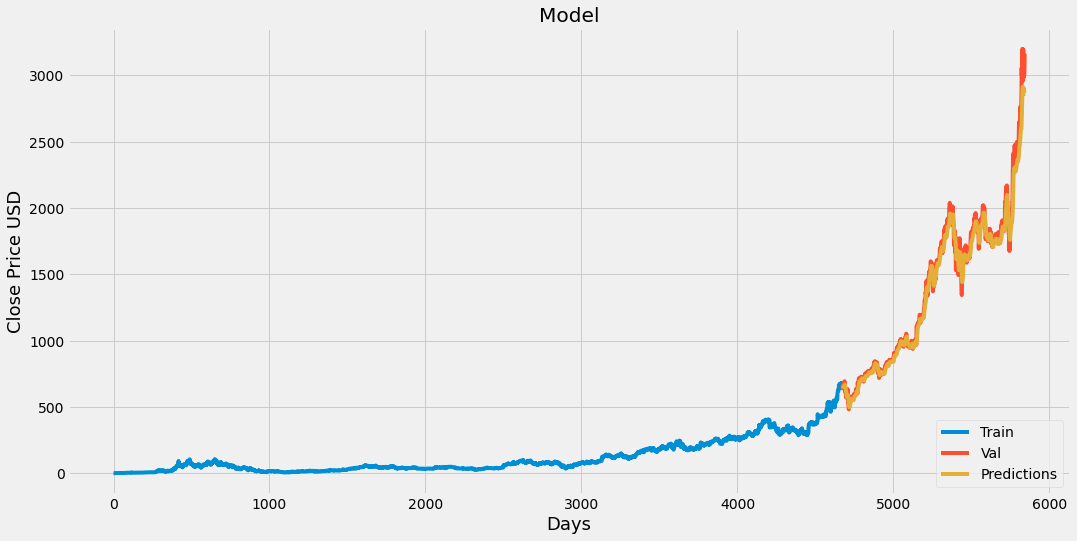

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visuaization
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close Price USD',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



In [ ]:
valid

,Close,Predictions
4674,662.320007,662.683105
4675,640.150024,660.993530
4676,657.909973,655.797424
4677,658.640015,652.791138
4678,675.770020,651.247375
...,...,...
5837,3055.209961,2880.509033
5838,3000.330078,2875.445801
5839,3033.530029,2866.138428
5840,3051.879883,2862.039795


In [ ]:
new_df = df.filter(['Close'])
last_60_days = new_df[-60:].values
# Last 60 days closing price values and converting it to an array
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Appending last 60 days
X_test.append(last_60_days_scaled)
#Converst the X_test data set to numpy array
X_test = np.array(X_test)
# reshaping to 3d
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[2882.169]]


In [ ]:
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
5841,2020-07-31,3244.0,3246.820068,3151.0,3164.679932,3164.679932,8085500
